# Import libraries

In [1]:
import os
import sys
import json
import csv

# numeric, scientific
from scipy import linalg as spla
import numpy as np

# plotting
%matplotlib inline
import matplotlib
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib.pyplot as plt

# import Kitaev Honeycomb package
import kithcmb
from kithcmb import DisorderVortexSectors as vs

# import jsci, CT's enhanced json stream write package
import jsci
from jsci import WriteStream as jsciwrite
from jsci import Coding as jscicoding

# Define functions

Plot the real and imaginary parts of a complex matrix next to each other

In [2]:
def draw_real_imag_matrix(matrix_):
    plt.figure( figsize=(18,8) )

    plt.subplot(1, 2, 1)
    plt.imshow( np.real(matrix_).tolist() )
    plt.colorbar()

    plt.subplot(1, 2, 2)
    plt.imshow( np.imag(matrix_).tolist() )
    plt.colorbar()

    plt.show()

These functions show the spatial support of a given eigenstate over the honeycomb. The probability (mod squared amplitude) of the eigenstate at each black and white site is added together to give a square lattice of sites. 

The final function plots the spatial profile of the two eigenstates that together compose a single mode. (Near the middle of the spectrum, where you get extra degeneracy this might not work right.)

In [3]:
def get_spatial_matrix_elements(full_eigeninfo,state_,site_):
    return ( full_eigeninfo[1][site_+1][state_]*np.conjugate(full_eigeninfo[1][site_+1][state_]) + full_eigeninfo[1][site_][state_]*np.conjugate(full_eigeninfo[1][site_][state_]) )
    
def draw_spatial_eigenstate(full_eigeninfo,state_):
    spatial_eigenstate = [ [ get_spatial_matrix_elements(full_eigeninfo,state_,x + (y-1)*L ) for x in range(0,2*L,2) ] for y in range(L) ]
    draw_real_imag_matrix(spatial_eigenstate)
    
def draw_pair_states(full_eigeninfo,state_):
    # print full_eigeninfo[0][state_],' ',full_eigeninfo[0][2*L**2 -1 -state_]
    state1 = [ [ get_spatial_matrix_elements(full_eigeninfo,state_,x + (y-1)*2*L ) for x in range(0,2*L,2) ] for y in range(1,L+1) ]
    state2 = [ [ get_spatial_matrix_elements(full_eigeninfo,2*L**2 -1 -state_,x + (y-1)*2*L ) for x in range(0,2*L,2) ] for y in range(1,L+1) ]
    
    plt.figure( figsize=(18,8) )

    plt.subplot(1, 2, 1)
    plt.imshow( np.real(state1).tolist(), cmap='BuPu' )
    plt.colorbar()

    plt.subplot(1, 2, 2)
    plt.imshow( np.real(state2).tolist(), cmap='BuPu' )
    plt.colorbar()

    plt.show()

# Set system parameters and initialise 

In [36]:
L = 20
J = 1
kappa = 0.01

In [37]:
kh_sys = vs.DisorderVortexSectors(L,J,kappa,0.01,1.0)
#kh_sys.set_full_vortex_sector()
#kh_sys.set_tri_vortex_lattice( 2 )
#kh_sys.disable_three_body_terms()
kh_sys.set_amplitude_disorder_random_vortex_configuration()

Print the disorder

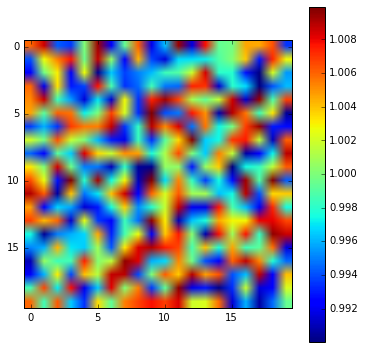

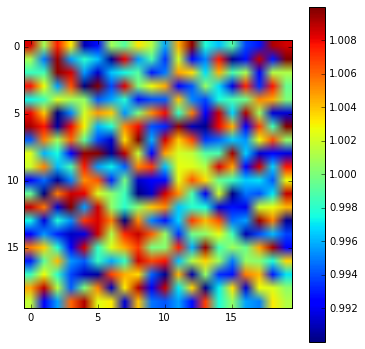

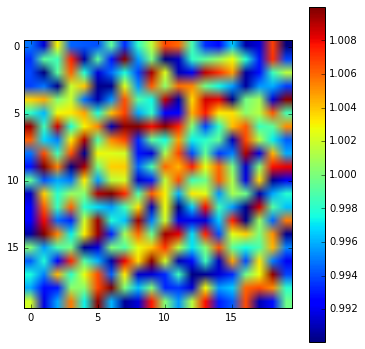

In [6]:
plt.figure( figsize=(6,6) )
plt.imshow(kh_sys.Jx)
plt.colorbar()
plt.show()

plt.figure( figsize=(6,6) )
plt.imshow(kh_sys.Jy)
plt.colorbar()
plt.show()

plt.figure( figsize=(6,6) )
plt.imshow(kh_sys.Jz)
plt.colorbar()
plt.show()

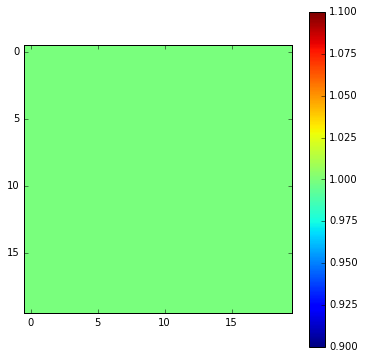

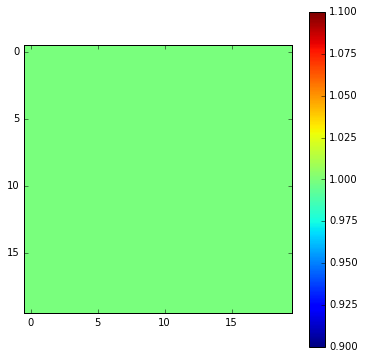

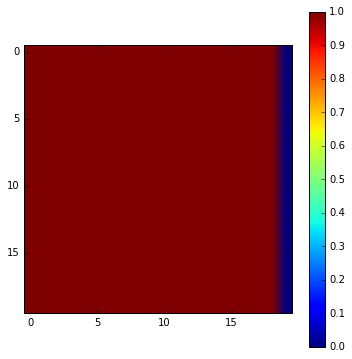

In [7]:
plt.figure( figsize=(6,6) )
plt.imshow(kh_sys.Ux)
plt.colorbar()
plt.show()

plt.figure( figsize=(6,6) )
plt.imshow(kh_sys.Uy)
plt.colorbar()
plt.show()

plt.figure( figsize=(6,6) )
plt.imshow(kh_sys.Uz)
plt.colorbar()
plt.show()

Print the A matrix

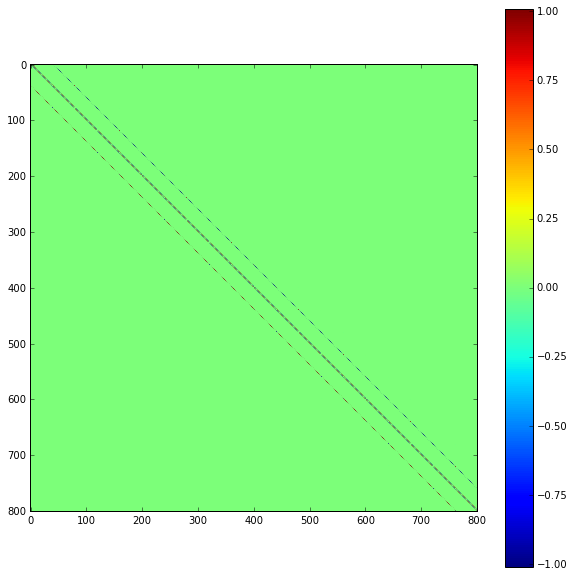

In [8]:
plt.figure( figsize=(10,10) )
plt.imshow(kh_sys.A - np.transpose(kh_sys.A))
plt.colorbar()
plt.show()

Plot the spectrum

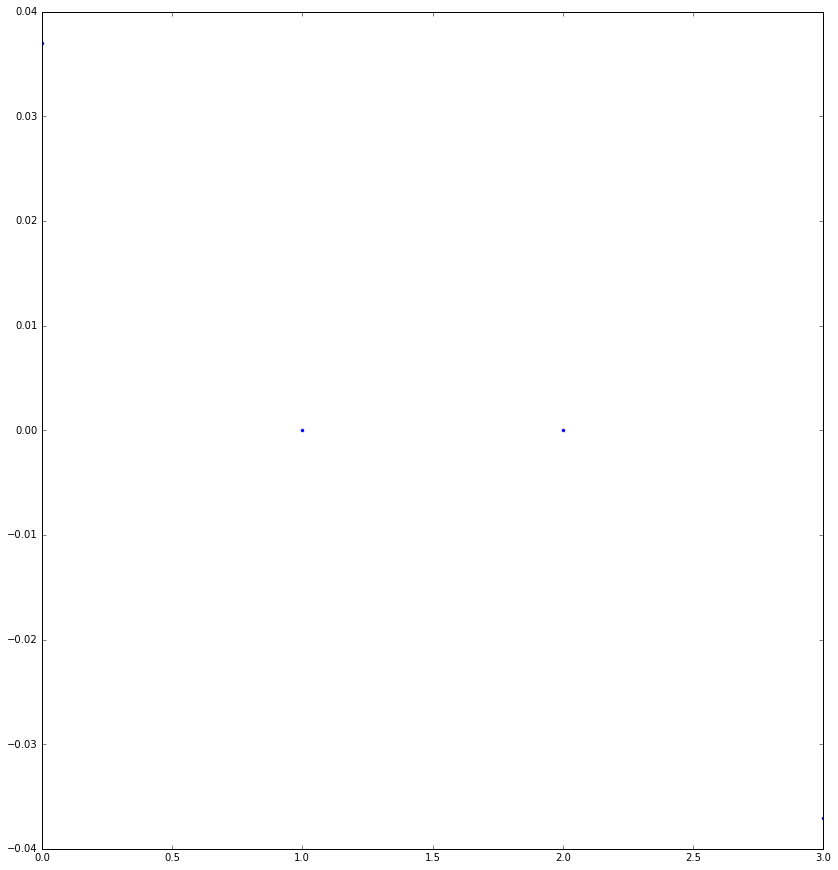

In [9]:
plt.figure( figsize=(14,15) )
plt.plot(kh_sys.spectrum[kh_sys.L**2-2:kh_sys.L**2+2],'.')

Plot the occupation probabilities of the particle and hole states at temperature beta (beta is set above and is the temp at which the previous current and correlation matrices are drawn)

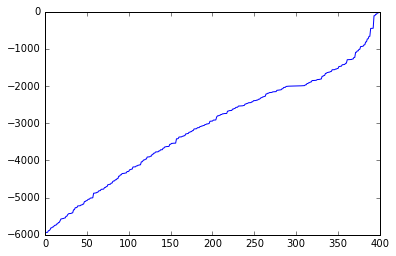

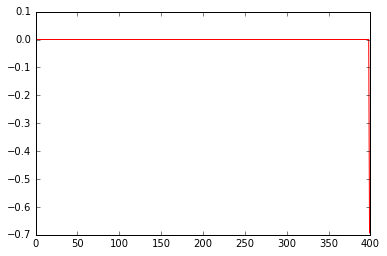

In [10]:
beta = 1E3
kh_sys.fermionic_occupations = None
plt.plot( (kh_sys.get_fermionic_expectation_values(beta)[1]) )
plt.show()
plt.plot( (kh_sys.get_fermionic_expectation_values(beta)[2]), color='r' )
plt.show()

Get the partition function as a temperature

In [44]:
betas = np.linspace(-3,3,60)

In [45]:
part_funcs = []
for bb in betas:
    part_funcs.append( kh_sys.get_log_partition_function( 10**bb ) )

Get the projected partition function as a temperature

In [46]:
proj_part_funcs = []
for bb in betas:
    proj_part_funcs.append( kh_sys._compute_projected_log_partition_function( 10**bb )[0] )

Plot the temperature profile of the projected and unprojected partition functions

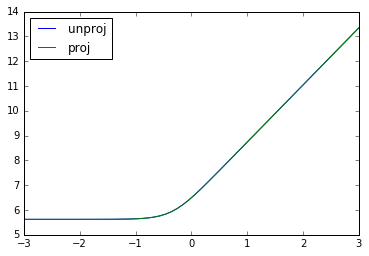

In [47]:
plt.plot(betas, np.log(np.array(part_funcs)), label="unproj")
plt.plot(betas, np.log(np.array(proj_part_funcs)), label="proj")
plt.legend(loc=2)
plt.show()

In [48]:
print kh_sys.spectrum[kh_sys.L**2]
print kh_sys.spectrum[kh_sys.L**2-1]

-5.89422636429e-08
5.8942274651e-08


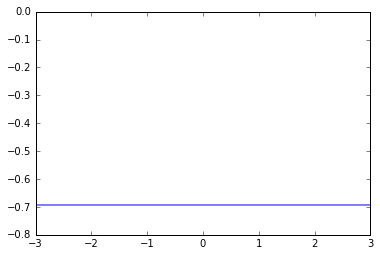

In [50]:
plt.plot(betas, (np.array(proj_part_funcs))-(np.array(part_funcs)) )
plt.ylim(-0.8,0)
plt.show()

Projection of the fermionic occupations

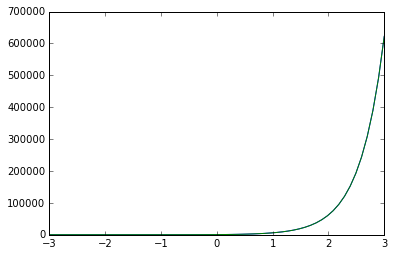

In [51]:
part_funcs = []
proj_part_funcs = []
for bb in betas:
    part_funcs.append( kh_sys._compute_fermionic_expectation_values(10**bb)[0] )
    proj_part_funcs.append( kh_sys._compute_projected_fermionic_expectation_values(10**bb)[0] )
plt.plot( betas, part_funcs )
plt.plot( betas, proj_part_funcs )
plt.show()

In [75]:
betas = np.linspace(-3,3,60)
plot_data_unp = [ 0. for bb in range(len(betas)) ]
plot_data_p = [ 0. for bb in range(len(betas)) ]

for bb in range(len(betas)):
    plot_data_unp[bb] = np.exp(kh_sys._compute_fermionic_expectation_values(10**betas[bb])[1])[399]
    plot_data_p[bb] = np.exp(kh_sys._compute_projected_fermionic_expectation_values(10**betas[bb])[1])[399]

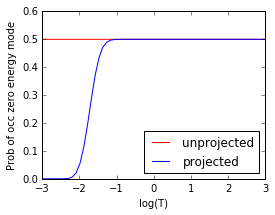

In [76]:
plt.figure( figsize=(4,3) )
    
plt.plot( -betas, plot_data_unp, color='r', label="unprojected")
plt.plot( -betas, plot_data_p, color='b', label="projected")
plt.ylim(0,0.6)

plt.xlabel("log(T)")
plt.ylabel("Prob of occ zero energy mode")

plt.legend(loc=4)

#plt.savefig('altered_mixing_over_zero_mode.pdf')
plt.show()

0.001


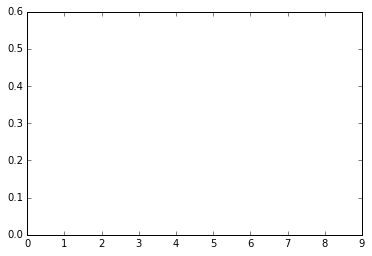

0.01


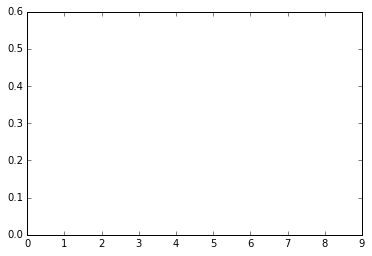

0.1


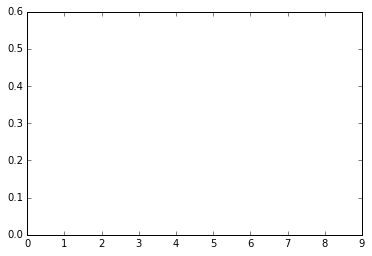

1.0


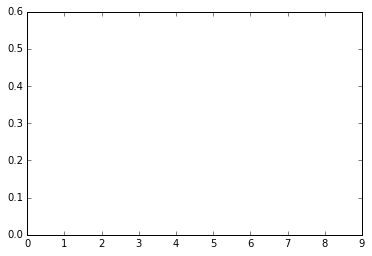

10.0


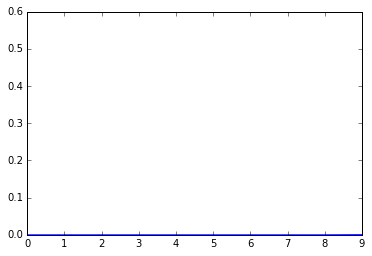

100.0


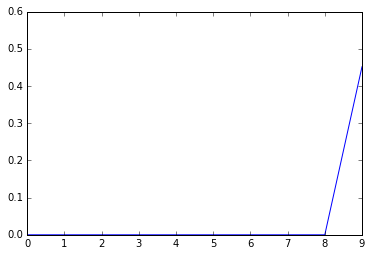

1000.0


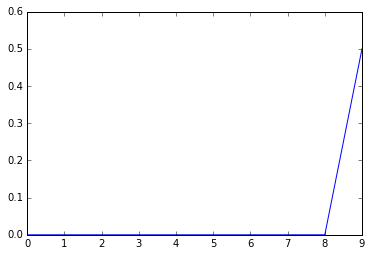

In [25]:
#beta = 1.5
betas = [10**bb for bb in np.linspace(-3,3,7)]
ax = plt.subplot(111)
for beta in betas:
    print beta
    plt.plot( (np.exp(kh_sys._compute_fermionic_expectation_values(beta)[1])-np.exp(kh_sys._compute_projected_fermionic_expectation_values(beta)[1]))[390:] )
    plt.ylim(0,0.6)
    plt.show()

In [ ]:
#beta = 1.5
betas = [10**bb for bb in np.linspace(-3,3,7)]
ax = plt.subplot(111)
for beta in betas:
    plt.plot( np.exp(kh_sys._compute_fermionic_expectation_values(beta)[1]), color='b' )
    plt.plot( np.exp(kh_sys._compute_projected_fermionic_expectation_values(beta)[1]) ,label='b='+str(beta), color='r' )
ax.legend(bbox_to_anchor=(1.4, 1.))
plt.ylim([0,1.1])
plt.show()

ax = plt.subplot(111)
for beta in betas:
    plt.plot( np.exp(kh_sys._compute_fermionic_expectation_values(beta)[2]), color='b' )
    plt.plot( np.exp(kh_sys._compute_projected_fermionic_expectation_values(beta)[2]) ,label='b='+str(beta), color='r' )
ax.legend(bbox_to_anchor=(1.4, 1.))
plt.ylim([0,1.1])
plt.show()

The spatial profile of some eigenstates

In [ ]:
# obtain the eigenvectors
full_eigeninfo = spla.eigh(2j*( kh_sys.A-np.transpose(kh_sys.A) ) )

In [ ]:
draw_pair_states(full_eigeninfo,L**2-3)

In [ ]:
state_ = L**2-2
state1 = [ [ get_spatial_matrix_elements(full_eigeninfo,state_,x + (y-1)*2*L ) for x in range(0,2*L,2) ] for y in range(1,L+1) ]
plt.imshow( np.real(state1).tolist(), cmap='BuPu' )

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off

plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left='off',      # ticks along the bottom edge are off
    right='off',         # ticks along the top edge are off
    labelleft='off') # labels along the bottom edge are off

plt.xlabel('x')
plt.ylabel('y')

plt.savefig('state_bottom.pdf')